In [35]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import codecs
from konlpy.tag import Twitter
from gensim.models import word2vec
from konlpy.utils import pprint
from sklearn.manifold import TSNE
from konlpy.tag import Okt


In [3]:
sentences = [
                ['this', 'is', 'a',   'good',      'product'],
                ['it',   'is', 'a',   'excellent', 'product'],
                ['it',   'is', 'a',   'bad',       'product'],
                ['that', 'is', 'the', 'worst',     'product']
            ]

# 문장을 이용하여 단어와 벡터를 생성한다.
model = Word2Vec(sentences, 
                 size=20,     # 차원 수
                 window=3,    # 중심단어로부터의 거리
                 min_count=1)  # 빈도수가 너무 낮으면 안하겠다.

In [7]:
# 단어벡터를 구한다.
word_vectors = model.wv

print(word_vectors["this"])

[-0.0217476  -0.01834363 -0.01973844 -0.00814085 -0.00617995 -0.0216874
 -0.00861182 -0.01433533  0.02484748 -0.01885777 -0.00894162 -0.00469417
 -0.02173961  0.01314433  0.00502044  0.01707056  0.01147478  0.0096593
  0.00476594  0.02063205]


In [9]:
# this라는 단어의 5차원짜리 벡터값
model = Word2Vec(sentences, 
                 size=5, 
                 window=3,    # 중심단어로부터의 거리
                 min_count=1)  # 빈도수가 너무 낮으면 안하겠다.
# 단어벡터를 구한다.
word_vectors = model.wv

print(word_vectors["this"])
print(word_vectors["the"])

[-0.08699039 -0.0733745  -0.07895374 -0.0325634  -0.02471981]
[ 0.07241329 -0.05187954 -0.01255755 -0.08715502  0.08889344]


In [10]:
vocabs = word_vectors.vocab.keys()
print(vocabs)

dict_keys(['this', 'is', 'a', 'good', 'product', 'it', 'excellent', 'bad', 'that', 'the', 'worst'])


In [14]:
word_vector_list = [word_vectors[v] for v in vocabs]
print(word_vector_list)

[array([-0.08699039, -0.0733745 , -0.07895374, -0.0325634 , -0.02471981],
      dtype=float32), array([-0.07482396,  0.05385532, -0.02384919, -0.04173736, -0.0537877 ],
      dtype=float32), array([-0.03467679, -0.05151957, -0.00761504, -0.08906564, -0.01140006],
      dtype=float32), array([-0.08994149,  0.02699981,  0.03961104,  0.03117204,  0.05361737],
      dtype=float32), array([ 0.02055351, -0.08262691, -0.01091642, -0.06877185, -0.02805361],
      dtype=float32), array([0.01647392, 0.00464093, 0.08806422, 0.04283738, 0.00800003],
      dtype=float32), array([ 0.01294021,  0.02112894,  0.05733991, -0.04128728, -0.00013901],
      dtype=float32), array([ 0.08790047, -0.06546057, -0.03783765,  0.00995906, -0.04288856],
      dtype=float32), array([ 0.04063842,  0.00082684, -0.06459351,  0.02431924,  0.03637768],
      dtype=float32), array([ 0.07241329, -0.05187954, -0.01255755, -0.08715502,  0.08889344],
      dtype=float32), array([0.024961  , 0.07224963, 0.02200351, 0.03686006,

In [22]:
# 두 단어의 유사도를 구해주는 similarity
print(model.wv.similarity(w1='it', w2='this'))

# 유사하면 할수록 1에 가까운, 유사하지 않을 수록 -1에 가깝다 (cos값)
# cos0 = 1, cos(pi) = -1

-0.7164389


In [28]:
# 'it'과 가장 유사한 단어 찾기(이건 주변에서 찾는 것이 아님)
print(model.wv.most_similar('it', topn=2)) # 가장 유사한 두 개 단어
model.wv.most_similar('it')    # 전부 찾기

[('excellent', 0.48087307810783386), ('worst', 0.39797210693359375)]


[('excellent', 0.48087307810783386),
 ('worst', 0.39797210693359375),
 ('good', 0.3274352550506592),
 ('bad', -0.17012359201908112),
 ('the', -0.20733048021793365),
 ('product', -0.36891573667526245),
 ('that', -0.41967612504959106),
 ('is', -0.45406121015548706),
 ('a', -0.49357736110687256),
 ('this', -0.716438889503479)]

## 네이버 후기 분석

In [29]:
#파일 읽기 함수. 첫줄 헤더를 제외하고 한 줄씩 읽어서 data 에 담아서 리턴 한다.
def read_data(filename):
    with open(filename, encoding='utf-8', mode='r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]   # header 제외
    return data

ratings_train = read_data('ratings_train.txt')

In [33]:
print(ratings_train[0])
print(ratings_train[1])

['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0']
['3819312', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '1']


In [38]:
okt = Okt()
def tokens(doc):
    return ['->'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

In [39]:
tokens("아 더빙.. 진짜 짜증나네요 목소리")

['아->Exclamation',
 '더빙->Noun',
 '..->Punctuation',
 '진짜->Noun',
 '짜증나다->Adjective',
 '목소리->Noun']

In [44]:
docs = []
for row in ratings_train:
    docs.append(row[1])
print(docs[:10])

['아 더빙.. 진짜 짜증나네요 목소리', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '너무재밓었다그래서보는것을추천한다', '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다', '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.', '원작의 긴장감을 제대로 살려내지못했다.', '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네', '액션이 없는데도 재미 있는 몇안되는 영화', '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?']


In [46]:
data = [tokens(d) for d in docs[:10]]
print(data)

[['아->Exclamation', '더빙->Noun', '..->Punctuation', '진짜->Noun', '짜증나다->Adjective', '목소리->Noun'], ['흠->Noun', '...->Punctuation', '포스터->Noun', '보고->Noun', '초딩->Noun', '영화->Noun', '줄->Noun', '....->Punctuation', '오버->Noun', '연기->Noun', '조차->Josa', '가볍다->Adjective', '않다->Verb'], ['너->Modifier', '무재->Noun', '밓었->Noun', '다그->Noun', '래서->Noun', '보다->Verb', '추천->Noun', '한->Josa', '다->Adverb'], ['교도소->Noun', '이야기->Noun', '구먼->Noun', '..->Punctuation', '솔직하다->Adjective', '재미->Noun', '는->Josa', '없다->Adjective', '..->Punctuation', '평점->Noun', '조정->Noun'], ['사이->Modifier', '몬페->Noun', '그->Determiner', '의->Noun', '익살스럽다->Adjective', '연기->Noun', '가->Josa', '돋보이다->Verb', '영화->Noun', '!->Punctuation', '스파이더맨->Noun', '에서->Josa', '늙다->Verb', '보이다->Verb', '하다->Verb', '커스틴->Noun', '던스트->Noun', '가->Josa', '너무나도->Adverb', '이쁘다->Adjective', '보이다->Verb'], ['막->Noun', '걸음->Noun', '마->Noun', '떼다->Verb', '3->Number', '세->Noun', '부터->Josa', '초등학교->Noun', '1->Number', '학년->Noun', '생인->Noun', '8->Number', '살다->Verb'

In [61]:
len(docs)

150000

In [47]:
# 15000개의 리뷰라서 시간이 좀 걸림
data = [tokens(d) for d in docs]

In [49]:
# 15000차원을 100차원으로 줄여버림
w2v_model = word2vec.Word2Vec(data, size=100, window = 3, min_count=2)

In [50]:
w2v_model.save("naver.model")

In [63]:
vocabs = w2v_model.wv.vocab.keys()
print(len(vocabs))
print(vocabs)

27477
dict_keys(['아->Exclamation', '더빙->Noun', '..->Punctuation', '진짜->Noun', '짜증나다->Adjective', '목소리->Noun', '흠->Noun', '...->Punctuation', '포스터->Noun', '보고->Noun', '초딩->Noun', '영화->Noun', '줄->Noun', '....->Punctuation', '오버->Noun', '연기->Noun', '조차->Josa', '가볍다->Adjective', '않다->Verb', '너->Modifier', '무재->Noun', '다그->Noun', '래서->Noun', '보다->Verb', '추천->Noun', '한->Josa', '다->Adverb', '교도소->Noun', '이야기->Noun', '구먼->Noun', '솔직하다->Adjective', '재미->Noun', '는->Josa', '없다->Adjective', '평점->Noun', '조정->Noun', '사이->Modifier', '몬페->Noun', '그->Determiner', '의->Noun', '익살스럽다->Adjective', '가->Josa', '돋보이다->Verb', '!->Punctuation', '스파이더맨->Noun', '에서->Josa', '늙다->Verb', '보이다->Verb', '하다->Verb', '커스틴->Noun', '던스트->Noun', '너무나도->Adverb', '이쁘다->Adjective', '막->Noun', '걸음->Noun', '마->Noun', '떼다->Verb', '3->Number', '세->Noun', '부터->Josa', '초등학교->Noun', '1->Number', '학년->Noun', '생인->Noun', '8->Number', '살다->Verb', '.->Punctuation', 'ㅋㅋㅋ->KoreanParticle', '별->Modifier', '반개->Noun', '도->Josa', '아깝다->Adject

In [54]:
# 남자 + 여배우 - 배우 = 여자
# 남자 - 배우 = 여자 - 여배우
# u : 유니코드 인코딩 방식(어차피 유니코드 인코딩 되어 있어서 u붙여도 되고 안붙여도 됌)

print(w2v_model.wv.most_similar(positive=tokens(u'남자 여배우'), 
                               negative=tokens(u'배우'), topn=5))

[('여자->Noun', 0.8372923731803894), ('여주->Noun', 0.7310375571250916), ('아빠->Noun', 0.7300735712051392), ('여자애->Noun', 0.7169704437255859), ('꼬마->Noun', 0.6973220109939575)]


In [55]:
# '정우성' 근처에 있는 단어들
print(w2v_model.wv.most_similar(tokens('정우성')))

[('서인국->Noun', 0.8946755528450012), ('패닝->Noun', 0.8882502317428589), ('한예슬->Noun', 0.8876131772994995), ('장혁->Noun', 0.8808282613754272), ('황정민->Noun', 0.877336859703064), ('유준상->Noun', 0.8745915293693542), ('조인성->Noun', 0.8744663000106812), ('박중훈->Noun', 0.8737333416938782), ('김혜수->Noun', 0.8699798583984375), ('전도연->Noun', 0.8675191402435303)]


In [57]:
print(w2v_model.wv.most_similar(tokens('약하다')))

[('산만하다->Adjective', 0.8198115229606628), ('부족하다->Adjective', 0.8059150576591492), ('억지스럽다->Adjective', 0.7999939322471619), ('부실하다->Adjective', 0.790895938873291), ('밋밋하다->Adjective', 0.7893738746643066), ('빈약하다->Adjective', 0.7852247953414917), ('부자연스럽다->Adjective', 0.7749964594841003), ('황당하다->Adjective', 0.7731294631958008), ('난해하다->Adjective', 0.7687803506851196), ('조잡하다->Adjective', 0.7672489881515503)]


In [60]:
print(w2v_model.wv.most_similar(tokens('엄마')))

[('아빠->Noun', 0.9230288863182068), ('아버지->Noun', 0.8468381762504578), ('친구->Noun', 0.83200603723526), ('여자친구->Noun', 0.8318672180175781), ('할머니->Noun', 0.81334388256073), ('고양이->Noun', 0.7850050926208496), ('딸->Noun', 0.7834813594818115), ('남자->Noun', 0.7695226073265076), ('아내->Noun', 0.7679380178451538), ('언니->Noun', 0.7593216300010681)]


---

In [83]:
vocabs = w2v_model.wv.vocab.keys()
print(len(vocabs))

27477


In [66]:
vocab = list(w2v_model.wv.vocab)
print(vocab)

['아->Exclamation', '더빙->Noun', '..->Punctuation', '진짜->Noun', '짜증나다->Adjective', '목소리->Noun', '흠->Noun', '...->Punctuation', '포스터->Noun', '보고->Noun', '초딩->Noun', '영화->Noun', '줄->Noun', '....->Punctuation', '오버->Noun', '연기->Noun', '조차->Josa', '가볍다->Adjective', '않다->Verb', '너->Modifier', '무재->Noun', '다그->Noun', '래서->Noun', '보다->Verb', '추천->Noun', '한->Josa', '다->Adverb', '교도소->Noun', '이야기->Noun', '구먼->Noun', '솔직하다->Adjective', '재미->Noun', '는->Josa', '없다->Adjective', '평점->Noun', '조정->Noun', '사이->Modifier', '몬페->Noun', '그->Determiner', '의->Noun', '익살스럽다->Adjective', '가->Josa', '돋보이다->Verb', '!->Punctuation', '스파이더맨->Noun', '에서->Josa', '늙다->Verb', '보이다->Verb', '하다->Verb', '커스틴->Noun', '던스트->Noun', '너무나도->Adverb', '이쁘다->Adjective', '막->Noun', '걸음->Noun', '마->Noun', '떼다->Verb', '3->Number', '세->Noun', '부터->Josa', '초등학교->Noun', '1->Number', '학년->Noun', '생인->Noun', '8->Number', '살다->Verb', '.->Punctuation', 'ㅋㅋㅋ->KoreanParticle', '별->Modifier', '반개->Noun', '도->Josa', '아깝다->Adjective', '움->Noun',

In [67]:
X = w2v_model[vocab]
print(X.shape)
print(X)

(27477, 100)
[[ 1.07595764e-01 -5.96993208e-01  4.11786348e-01 ... -2.86921203e-01
  -1.86217988e+00  2.29185796e+00]
 [ 1.49846539e-01  3.74015599e-01  4.18397151e-02 ... -1.20074296e+00
  -1.06053591e+00  4.28159356e-01]
 [ 4.58782524e-01  2.11642221e-01  1.04618013e-01 ... -5.70240438e-01
   5.03647089e-01  5.55795193e-01]
 ...
 [-2.58444902e-02 -2.99459975e-03  1.50598912e-03 ...  2.03734729e-02
  -2.35528145e-02 -5.55675570e-03]
 [-3.31237130e-02 -2.60484423e-02 -9.83414892e-03 ...  1.00369996e-03
  -5.59134549e-03  2.67688129e-02]
 [-2.79195718e-02  2.25997642e-02 -6.00446539e-04 ... -3.43775027e-03
  -3.16833891e-02 -5.85082639e-03]]


C:\Users\student\.conda\envs\tt\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [70]:
tsne = TSNE(n_components=2) # 2차원으로 축소

In [72]:
X_tsne = tsne.fit_transform(X[:300,:])

In [74]:
print(X_tsne.shape)
# print(X_tsne)

(300, 2)


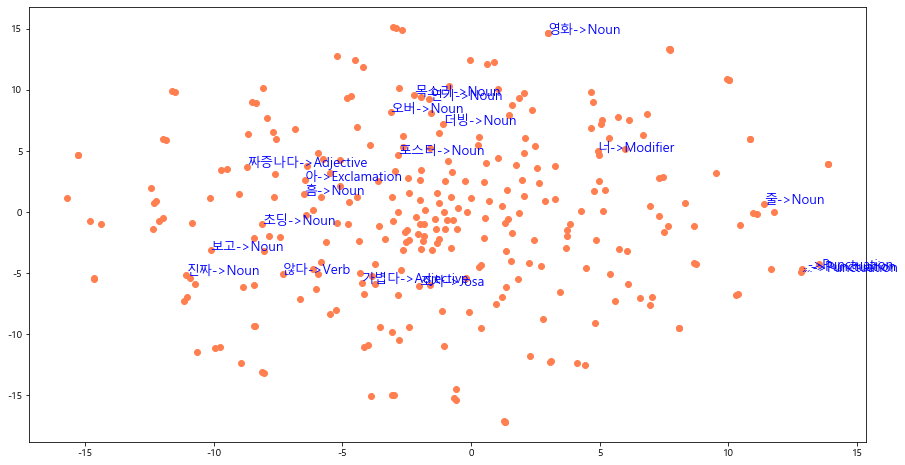

In [87]:
from matplotlib import font_manager, rc
import matplotlib as mpl
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

fig=plt.figure(figsize=(15,8))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c='coral')

words = vocab[:20]    
for i, word in enumerate(words):
    plt.text(X_tsne[i,0], X_tsne[i,1 ], word, fontsize=13, color='blue') 

plt.savefig('out.png', dpi=200)  # 저장
plt.show()

C:\Users\student\.conda\envs\tt\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\student\.conda\envs\tt\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


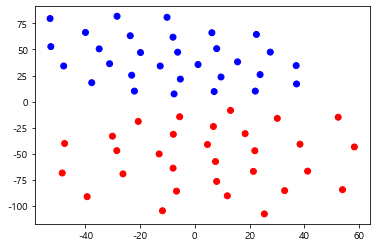

In [88]:
group1 = w2v_model.wv.most_similar(tokens('짜증나다'), topn=30)
group1 = [w for ( w,  s )  in  group1 ]
X1 = w2v_model[group1]

group2 = w2v_model.wv.most_similar(tokens('정우성'), topn=30)
group2 = [w for ( w,  s )  in  group2 ]
X2 = w2v_model[group2]

X_tsne =tsne.fit_transform(np.vstack([X1, X2]))

label = np.hstack([0*np.ones(30), np.ones(30)  ])
c = [ 'red'  if l == 0  else 'blue'  for l in label ]

# 빨간색이 짜증나다, 파란색이 정우성과 관련있는 데이터들
plt.scatter(X_tsne[:,0], X_tsne[:,1], color=c)

C:\Users\student\.conda\envs\tt\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\student\.conda\envs\tt\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


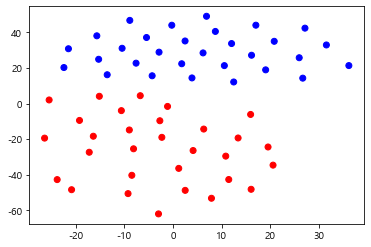

In [94]:
group1 = w2v_model.wv.most_similar(tokens('엄마'), topn=30)
group1 = [w for ( w,  s )  in  group1 ]
X1 = w2v_model[group1]

group2 = w2v_model.wv.most_similar(tokens('정우성'), topn=30)
group2 = [w for ( w,  s )  in  group2 ]
X2 = w2v_model[group2]

X_tsne =tsne.fit_transform(np.vstack([X1, X2]))

label = np.hstack([0*np.ones(30), np.ones(30)  ])
c = [ 'red'  if l == 0  else 'blue'  for l in label ]

# 빨간색이 짜증나다, 파란색이 정우성과 관련있는 데이터들
plt.scatter(X_tsne[:,0], X_tsne[:,1], color=c)

C:\Users\student\.conda\envs\tt\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\student\.conda\envs\tt\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


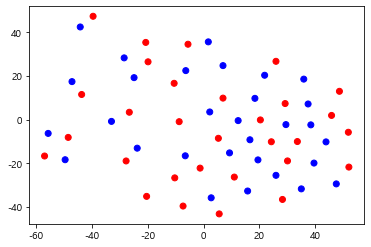

In [90]:
# '엄마'와 '아빠'라는 단어가 유사하기 때문에 scatterplot이 겹치게 나옴

group1 = w2v_model.wv.most_similar(tokens('엄마'), topn=30)
group1 = [w for ( w,  s )  in  group1 ]
X1 = w2v_model[group1]

group2 = w2v_model.wv.most_similar(tokens('아빠'), topn=30)
group2 = [w for ( w,  s )  in  group2 ]
X2 = w2v_model[group2]

X_tsne =tsne.fit_transform(np.vstack([X1, X2]))

label = np.hstack([0*np.ones(30), np.ones(30)  ])
c = [ 'red'  if l == 0  else 'blue'  for l in label ]

# 빨간색이 짜증나다, 파란색이 정우성과 관련있는 데이터들
plt.scatter(X_tsne[:,0], X_tsne[:,1], color=c)